In [2]:
import importlib
try:
    importlib.reload(utils)
    importlib.reload(coords)
    importlib.reload(bot_base)
except NameError:
    # first execution, most likely
    pass 
import utils
import coords
import bot_base
from utils import *
from coords import *
from bot_base import *
import numpy as np
import cv2

In [3]:
stats = {
    'energy': {
        'base_power': 6.9,
        'equip_power_modifier': 1.37,
        'bars': 11,
        'equip_bars_modifier': 1,
        'cap': 450000,
        'equip_cap_modifier': 1,
        'base_speed': 32.5,
        'equip_speed_modifier': 1.54
    },
    'magic': {
        'base_power': 1,
        'equip_power_modifier': 1.00,
        'bars': 1,
        'equip_bars_modifier': 1,
        'cap': 10000,
        'equip_cap_modifier': 1,
        'base_speed': 3.3,
        'equip_speed_modifier': 1.00
    }
}

In [4]:
find_bbox_coords(["inventory_6"])

('inventory_6', (1236, 365, 1318, 426)),


In [5]:
bbox_i6 = (786, 542, 835, 589)

In [38]:
img = screenshot(bbox_i6)
tmpl = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
tmpl

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [22]:
template.shape[::-1]

(3, 49, 47)

In [36]:
PIL.Image.fromarray?

In [48]:
tmpl = cv2.imread("chedder.png")
PIL.Image.fromarray(tmpl, "RGB")

0.09771013259887695


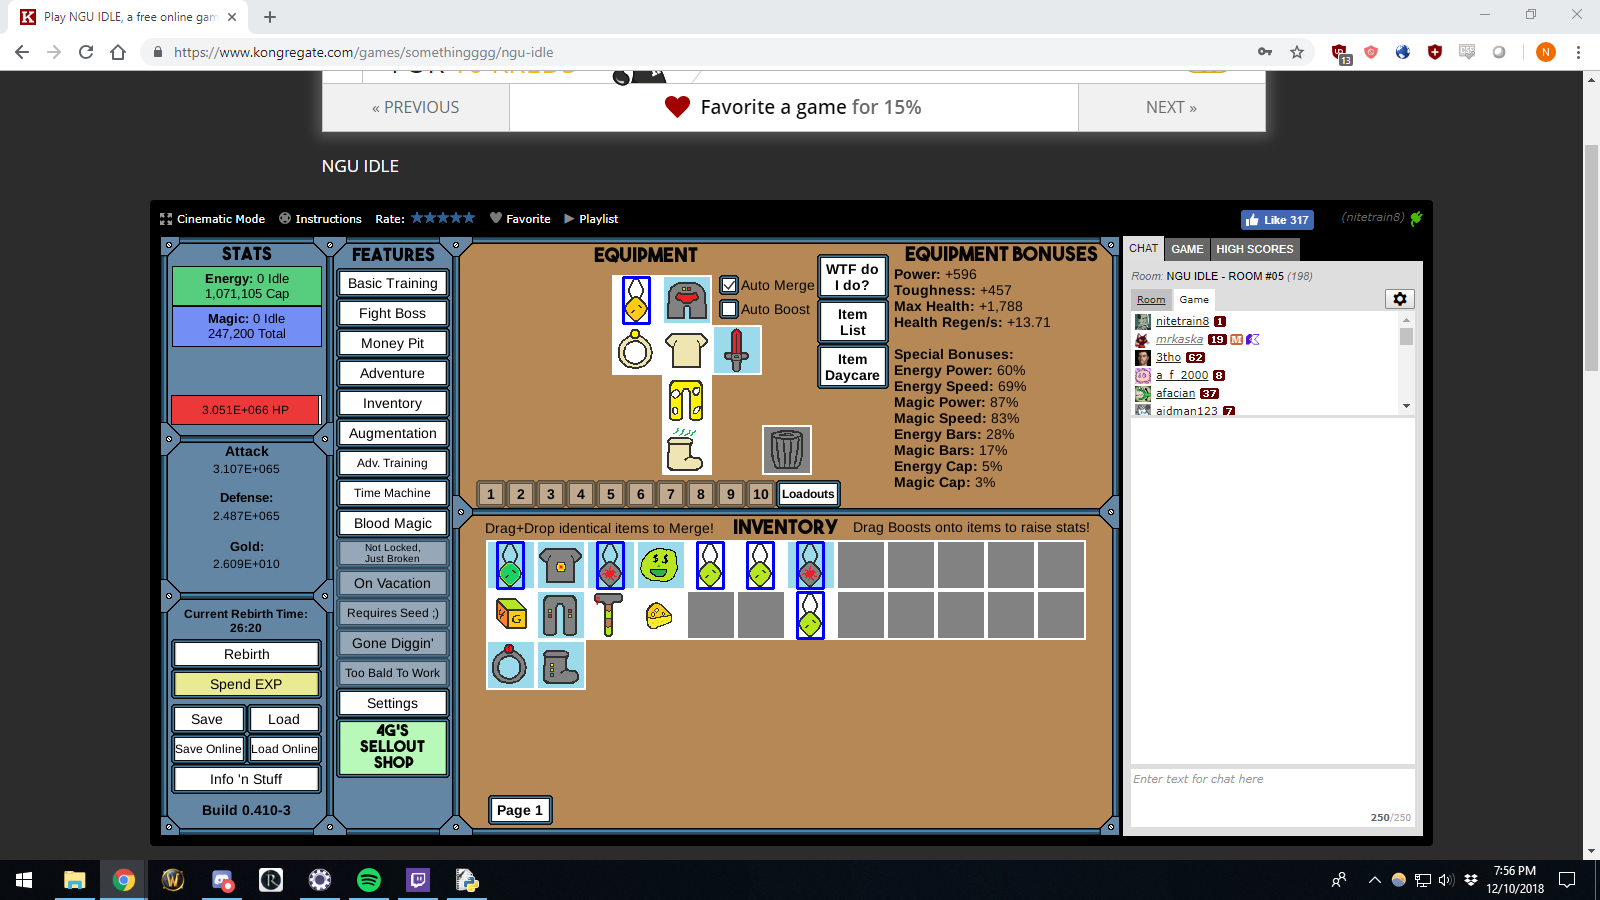

In [53]:
import time
t = time.time()
img_rgb = np.array(screenshot())
img_gray = cv2.cvtColor((img_rgb), cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(tmpl, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imshow("test", img_rgb)
print(time.time() - t)
PIL.Image.fromarray(img_rgb)

e9acb043e431c7ce
e98cb043e433c7ce
bcc9e136e06493ce
e9acb043e431c7ce
e9acb043e431c7ce
bcc9e136e06493ce
cd69a91596b29696


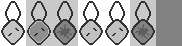

In [80]:
ys, xs = loc
imgs = []
aimg = Image.new('P', (w*len(xs), h))
d = {}
ds = []
for i, (x, y) in enumerate(zip(xs, ys)):
    img = screenshot((x, y, x+w, y+h))
    img2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    img3 = PIL.Image.fromarray(img2, "L")
    aimg.paste(img3, (w*i, 0))
    s = str(imagehash.phash(img3))
    d[s] = img2
    ds.append(s)
    print(s)
aimg

In [77]:
Image.new??

In [70]:
cmp = []
for a in ds:
    for b in ds:
        cmp.append(a==b)
for i, r in enumerate(cmp):
    if i and i%len(ds) == 0:
        print()
    print(str(r)[0], end="  ")

T  F  F  T  T  F  T  
F  T  F  F  F  F  F  
F  F  T  F  F  T  F  
T  F  F  T  T  F  T  
T  F  F  T  T  F  T  
F  F  T  F  F  T  F  
T  F  F  T  T  F  T  

In [67]:
ds[0] == ds[4]

True

In [65]:
img

In [17]:
import imagehash

In [23]:
img = PIL.Image.fromarray(template)
h=imagehash.average_hash(img)

In [26]:
h

array([[ True,  True,  True, False, False,  True,  True,  True],
       [ True,  True, False, False, False,  True,  True,  True],
       [ True,  True, False, False, False,  True,  True,  True],
       [ True,  True, False, False, False,  True,  True,  True],
       [ True,  True, False, False, False, False,  True,  True],
       [ True,  True, False, False, False, False,  True,  True],
       [ True,  True,  True, False, False,  True,  True,  True],
       [ True, False, False, False, False, False, False,  True]])